# NETFLIX MOVIES AND TV SHOWS

In [1]:
#loading importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("../input/netflix-shows/netflix_titles.csv")

# DISPLAY THE TOP 5 COLUMNS USING HEAD

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.dtypes # displaying the data types

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# DISPLAYING THE ROWS AND COLUMNS USING SHAPE

In [7]:
df.shape  #7787 records and 12 columns

(7787, 12)

In [8]:
df.isnull().sum()  # sum of null values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#percentage of null values
df.isnull().sum()/(len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
#director column having maximum of 30% null values
#director column has minimal use and having no logical way to replace values
#hence getting droped
director=df.dropna(axis=1)

In [11]:
#temporarily filling null values of date_added with unknown later to be replaced with logical value
df.date_added.fillna("unknown",inplace= True)

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# USING ANONYMOUS FUNCTION : LAMBDA

In [13]:
#creating new year column from date_added column
df["year"]= df.date_added.apply(lambda x: str(x).split(",")[-1])

In [14]:
#most occuring date:2019
df.year.value_counts()    #COUNTING THE VALUES USING VALUE_COUNTS()

 2019      2153
 2020      2009
 2018      1685
 2017      1225
 2016       443
 2021       117
 2015        88
 2014        25
 2011        13
 2013        11
unknown      10
 2012         3
 2008         2
 2009         2
 2010         1
Name: year, dtype: int64

In [15]:
#replacing unknown values with 2019(most occuring date year)
df["year"]= df.year.apply(lambda x: str(x).replace("unknown","2019"))

In [16]:
#removing extra space in the year column values
df["year"]= df.year.apply(lambda x: str(x).replace(" ",""))

In [17]:
df.year.value_counts()

2019    2163
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: year, dtype: int64

In [18]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
year               0
dtype: int64

In [19]:
df.country.value_counts() #displaying the most occurred country

United States                                                 2555
India                                                          923
United Kingdom                                                 397
Japan                                                          226
South Korea                                                    183
                                                              ... 
United Kingdom, France, Belgium, Canada, United States           1
United States, Brazil, South Korea, Mexico, Japan, Germany       1
Soviet Union, India                                              1
United States, Colombia, Mexico                                  1
United Arab Emirates, Jordan, Lebanon                            1
Name: country, Length: 681, dtype: int64

In [20]:
#filling null values of country with most occuring country
df.country.fillna("United_states",inplace= True)

In [21]:
df.rating.value_counts()   #displaying the most occurred rating

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [22]:
#filling null values of rating with most occuring rating
df.rating.fillna("TV-MA",inplace= True)

In [23]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
year               0
dtype: int64

# PLOTTING THE VALUES WITH USE OF SEABORN AND MATPLOTLIB

Text(0, 0.5, 'Number of country')

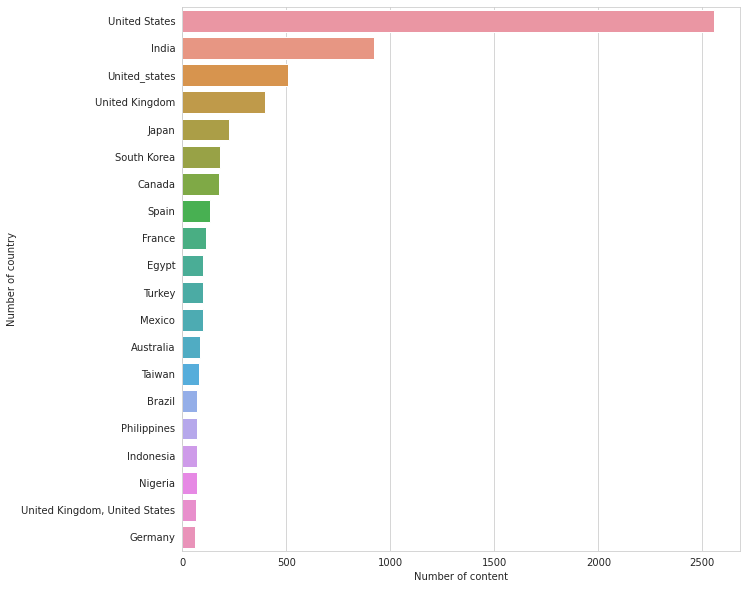

In [24]:
# displaying all the countries with most contribution to netflix content
x= df.country.value_counts().head(20)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")   #set style to whitegrid
ax= sns.barplot(x.values,x.index)   #using bar for visualization
ax.set_xlabel("Number of content")
ax.set_ylabel("Number of country")

<AxesSubplot:xlabel='type', ylabel='count'>

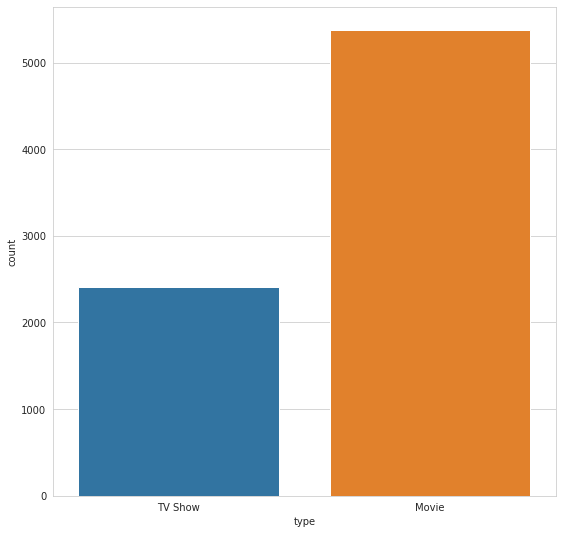

In [25]:
#distribution of type of content on netflix 
#69.1 percent of contents are movies while 30 percent are tv shows
plt.figure(figsize=(9,9))

x= df.type.value_counts()
sns.countplot(x= "type",data= df)

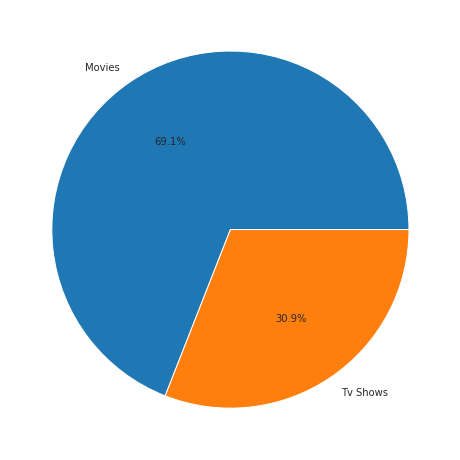

In [26]:
plt.figure(figsize=(8,10))

label= ["Movies","Tv Shows"]

plt.pie(x.values, labels= label ,autopct= "%1.1f%%") # visualizing using pie
plt.show()   

<AxesSubplot:xlabel='Year'>

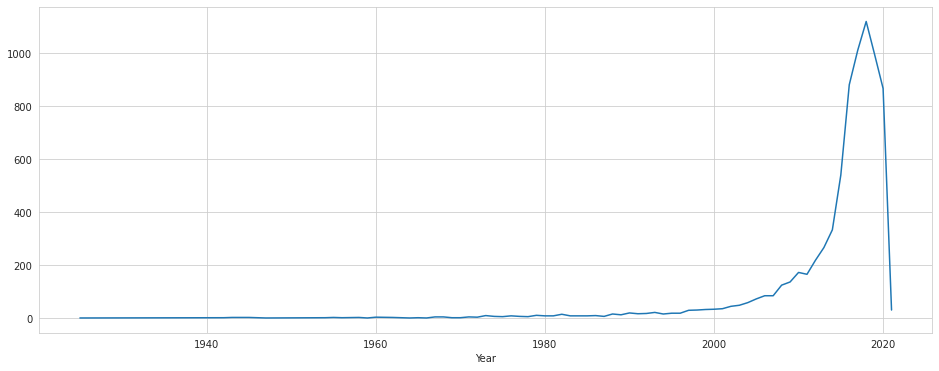

In [27]:
#Netflix content releases over the years
x= df.release_year.value_counts()
plt.figure(figsize=(16,6))
plt.xlabel("Year")

sns.lineplot(x=x.index ,y= x.values)

Text(0, 0.5, 'No of content')

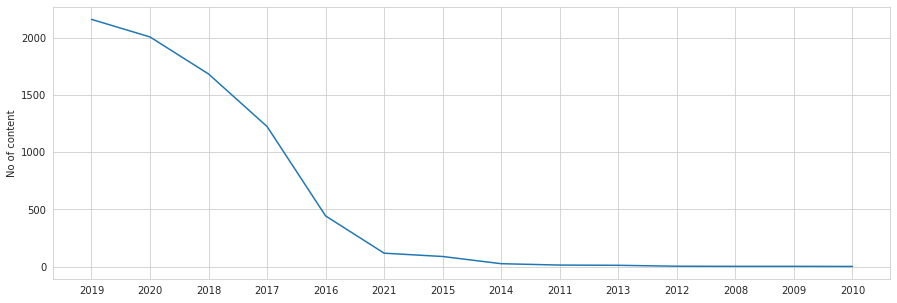

In [28]:
#Number of content added on netflix over the years
plt.figure(figsize=(15,5))
x= df.year.value_counts()
ax= sns.lineplot(x.index,x.values)
ax.set_ylabel("No of content")

<AxesSubplot:>

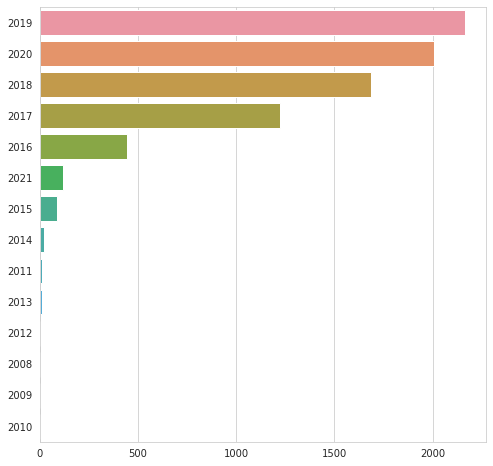

In [29]:
plt.figure(figsize=(8,8))

sns.barplot(x.values,x.index)

<AxesSubplot:xlabel='rating', ylabel='count'>

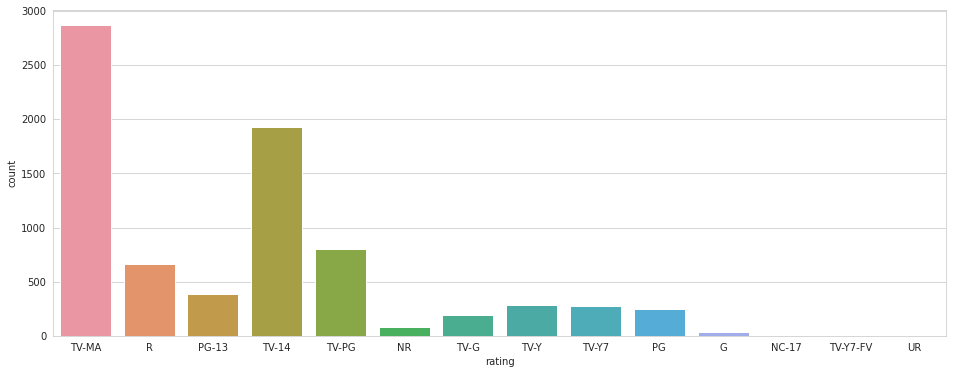

In [30]:
#content distribution based on rating
#most of the content of netflix is either rated TV-MA or TV-14
plt.figure(figsize=(16,6))
sns.countplot(x= "rating",data= df)

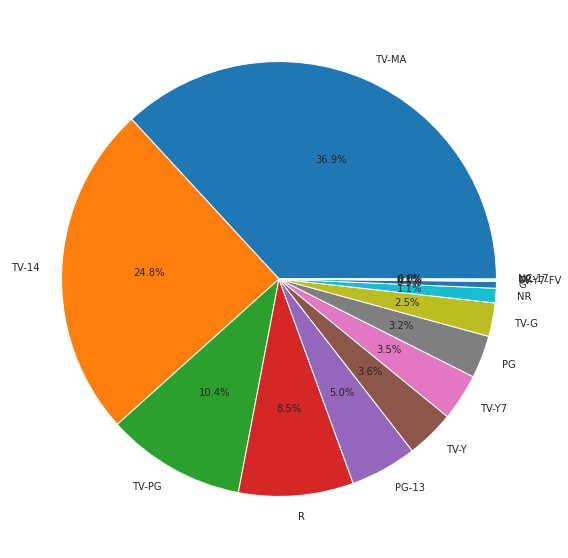

In [31]:
x= df.rating.value_counts()
plt.figure(figsize=(10,10))

labels= list(x.index)
plt.pie(x.values,labels= labels,autopct= "%1.1f%%")
plt.show()

GUYZ YOUR THOUGHTS AND FEEDBACKS ARE HIGHLY APPRECIATED 
#                   STAF SAFE AND TAKE CARE AND PLZ SHOW SOME LOVE ON THIS....